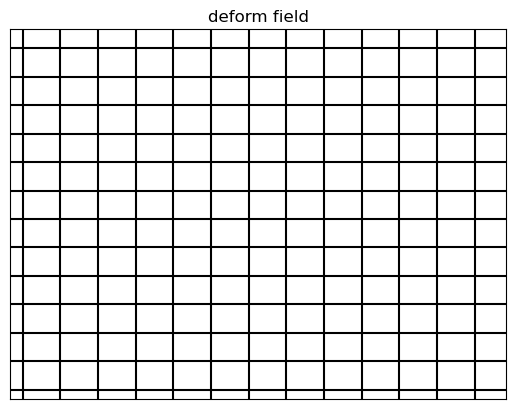

In [2]:
import matplotlib.pyplot as plt
import numpy as np
 
def grid2contour(grid):
    '''
    grid--image_grid used to show deform field
    type: numpy ndarray, shape： (h, w, 2), value range：(-1, 1)
    '''
    assert grid.ndim == 3
    x = np.arange(-1, 1, 2/grid.shape[1])
    y = np.arange(-1, 1, 2/grid.shape[0])
    X, Y = np.meshgrid(x, y)
    Z1 = grid[:,:,0] + 2#remove the dashed line
    Z1 = Z1[::-1]#vertical flip
    Z2 = grid[:,:,1] + 2
    
    plt.figure()
    plt.contour(X, Y, Z1, 15, colors='k')
    plt.contour(X, Y, Z2, 15, colors='k')
    plt.xticks(()), plt.yticks(())#remove x, y ticks
    plt.title('deform field')

img_shape = [40, 80]  
x = np.arange(-1, 1, 2/img_shape[1])
y = np.arange(-1, 1, 2/img_shape[0])
X, Y = np.meshgrid(x, y)
regular_grid = np.stack((X,Y), axis=2)
grid2contour(regular_grid)

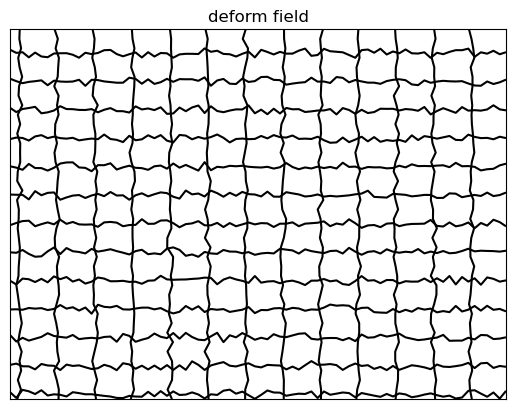

In [3]:
rand_field = np.random.rand(*img_shape,2)
rand_field_norm = rand_field.copy()
rand_field_norm[:,:,0] = rand_field_norm[:,:,0]*2/img_shape[1] 
rand_field_norm[:,:,1] = rand_field_norm[:,:,1]*2/img_shape[0] 
 
sampling_grid = regular_grid + rand_field_norm
grid2contour(sampling_grid)

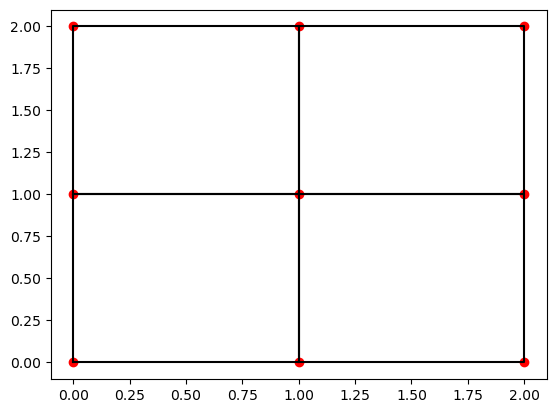

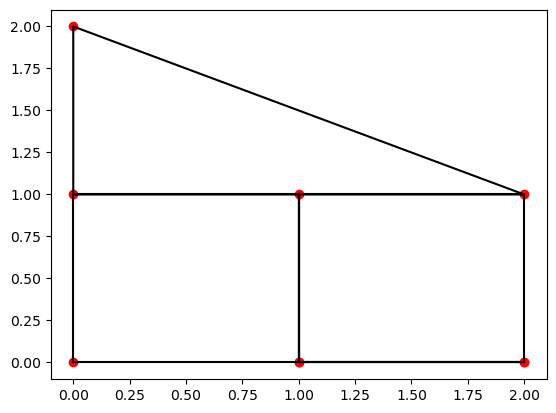

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 定义初始多边形网格
vertices = np.array([
    [0, 0], [1, 0], [2, 0],
    [0, 1], [1, 1], [2, 1],
    [0, 2], [1, 2], [2, 2]
])

# 定义多边形的连接
polygons = [
    [0, 1, 4, 3], [1, 2, 5, 4],
    [3, 4, 7, 6], [4, 5, 8, 7]
]

# 绘制初始网格
def plot_mesh(vertices, polygons):
    plt.figure()
    for poly in polygons:
        poly_vertices = vertices[poly]
        poly_vertices = np.append(poly_vertices, [poly_vertices[0]], axis=0)
        plt.plot(poly_vertices[:, 0], poly_vertices[:, 1], 'k-')
    plt.scatter(vertices[:, 0], vertices[:, 1], c='r')
    plt.show()

# 初始网格
plot_mesh(vertices, polygons)

# 定义需要变形的区域（例如右下角部分）
fold_region = [4, 5, 7, 8]
fold_vertices = vertices[fold_region]

# 定义仿射变换矩阵（例如90度旋转）
theta = np.radians(90)
c, s = np.cos(theta), np.sin(theta)
affine_matrix = np.array([[c, -s], [s, c]])

# 应用仿射变换
transformed_vertices = np.dot(fold_vertices - vertices[4], affine_matrix) + vertices[4]

# 更新顶点位置
vertices[fold_region] = transformed_vertices

# 绘制变形后的网格
plot_mesh(vertices, polygons)
